### 사이킷런으로 분류하기

In [8]:
import warnings

# 불필요한 경고 출력을 방지한다.
warnings.filterwarnings('ignore')

In [9]:
import pandas as pd

In [10]:
# iris 데이터셋
from sklearn.datasets import load_iris

In [11]:
# 테이터셋을 로드한다.
iris = load_iris()

In [12]:
data = iris['data']
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [13]:
# 지도학습 : 분류
target = iris['target']
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [14]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [15]:
# 데이터 프레임에 데이터셋 넣기
df_iris = pd.DataFrame(data, columns=iris.feature_names)

In [16]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
df_iris['target']=target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
#!pip install seaborn

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

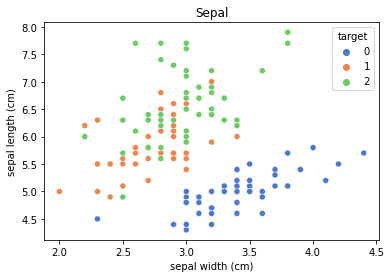

In [20]:
# scatterplot : 산점도 그래프
sns.scatterplot('sepal width (cm)','sepal length (cm)', hue='target', palette='muted', data=df_iris)
plt.title('Sepal')
plt.show()

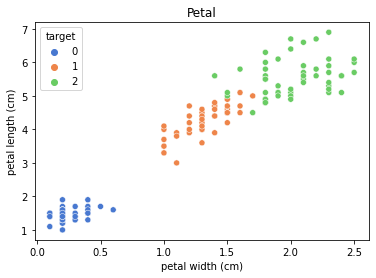

In [21]:
# scatterplot : 산점도 그래프
sns.scatterplot('petal width (cm)','petal length (cm)', hue='target', palette='muted', data=df_iris)
plt.title('Petal')
plt.show()

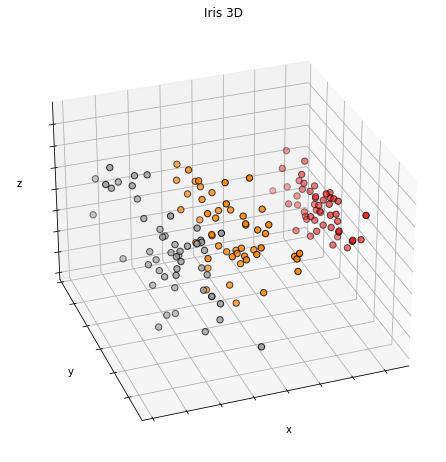

In [22]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(df_iris.drop('target', 1))
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=df_iris['target'],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Iris 3D")
ax.set_xlabel("x")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("y")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("z")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [23]:
# 학습할 데이터와 테스트 데이터를 나눈다.
from sklearn.model_selection import train_test_split

In [24]:
# df_iris.drop('target',1) 타겟값 지움
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target',1),df_iris['target'], test_size=0.2)

In [25]:
x_train.shape, x_valid.shape

((120, 4), (30, 4))

In [26]:
y_train.shape, y_valid.shape

((120,), (30,))

<AxesSubplot:xlabel='target', ylabel='count'>

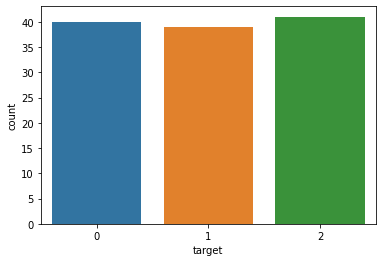

In [27]:
# 0,1,2 class 데이터 불균형이 있는지 확인할 필요가 있다.
sns.countplot(y_train)

In [28]:
# class별 데이터의 분포를 균등하게 배분
# stratify 
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target',1),df_iris['target'], test_size=0.2, stratify=df_iris['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

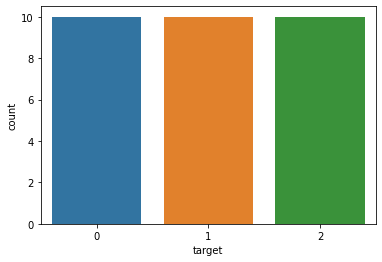

In [29]:
sns.countplot(y_valid)

### Logistic Regression

In [30]:
# 독립변수의 선형 결함을 이용하여 사건의 발생 가능성 예측
from sklearn.linear_model import LogisticRegression

In [31]:
# 1. 모델 선언
model = LogisticRegression()

In [32]:
model.fit(x_train, y_train)

LogisticRegression()

In [33]:
prediction = model.predict(x_valid)

In [34]:
prediction

array([1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 1,
       2, 0, 2, 2, 2, 0, 1, 2])

In [35]:
# Logistic Regression Model은 93% 정확도를 갖는다.
(prediction==y_valid).mean()

0.9666666666666667

### SGD Classifier

In [36]:
from sklearn.linear_model import SGDClassifier

In [37]:
# 1. 모델선언
# random_state = random seed
sgd = SGDClassifier(random_state = 119)

In [38]:
# 2. 모델학습
sgd.fit(x_train, y_train)

SGDClassifier(random_state=119)

In [39]:
# 3. 학습 결과 확인(테스트)
prediction = sgd.predict(x_valid)

In [40]:
(prediction==y_valid).mean()

0.7666666666666667

In [41]:
# 하이퍼파라메터 튜닝
# random_state: 하이퍼파라메터 튜닝시 고정
# n_jobs=-1: CPU Core를 모두 사용(학습속도가 빨라진다.)
# GPU가 아닌 CPU로 처리

In [42]:
# 과적합(overfitting)을 방지하기 위해 L1(Lasso Regulization)을 해준다.
sgd = SGDClassifier(penalty='l1', random_state=119, n_jobs=-1)

In [43]:
sgd.fit(x_train, y_train)

SGDClassifier(n_jobs=-1, penalty='l1', random_state=119)

In [44]:
prediction = sgd.predict(x_valid)

In [45]:
(prediction==y_valid).mean()

0.9

### KNN(K-Neighbors Classifier)

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
# 모델 정의
# default K = 5
model = KNeighborsClassifier()

In [49]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [50]:
prediction = model.predict(x_valid)

In [51]:
(prediction == y_valid).mean()

0.9666666666666667

if K = 7

In [55]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(x_train, y_train)
prediction = model.predict(x_valid)
(prediction == y_valid).mean()

0.9666666666666667

In [57]:
model = KNeighborsClassifier(n_neighbors=13)
model.fit(x_train, y_train)
prediction = model.predict(x_valid)
(prediction == y_valid).mean()

1.0

### 서포트 벡터 머신 (SVC)

> 새로운 데이터가 어느 카데고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만듦,
> 경계로 표현되는 데이터들 중 가장 큰 폭을 가진 경계를 찾는 알고리즘.

In [67]:
from sklearn.svm import SVC

In [68]:
model = SVC(random_state=123)

In [69]:
model.fit(x_train, y_train)

SVC(random_state=123)

In [70]:
prediction = model.predict(x_valid)

In [71]:
(prediction == y_valid).mean()

0.9666666666666667

### 의사 결정 트리(Decision Tree)

> 스무고개처럼, 나무 가지치기를 통해 소그릅으로 나누어 판별하는 것

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
model = DecisionTreeClassifier(random_state=0)

In [74]:
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [75]:
prediction = model.predict(x_valid)

In [78]:
(prediction == y_valid).mean()

0.9666666666666667

In [79]:
#!pip install graphviz

In [82]:
from sklearn.tree import export_graphviz
from subprocess import call

def graph_tree(model):
    # .dot 파일로 export 해줍니다
    export_graphviz(model, out_file='tree.dot')

    # 생성된 .dot 파일을 .png로 변환
    
    call(['dot', '-Tpng', 'tree.dot', '-o', 'decistion-tree.png', '-Gdpi=600'])

    # .png 출력
    return Image(filename = 'decistion-tree.jpg', width=500)

In [83]:
graph_tree(model)

FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다